# Interpolation of Cloud Atmosphere using scipy.interpolate.griddata

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from scipy.interpolate import griddata

## Creating a interpolation graph for cloud in atmosphere

> Using a cloud in an atmosphere

In [3]:
df_cloud_atm = pd.read_csv("../create_atm/atmospheres/cloud_atm_1-2.csv", header = None, index_col = 0)
N_cloud_atm = int(df_cloud_atm.shape[1]/2)

In [4]:
df2_cloud_atm = df_cloud_atm.T

In [5]:
effr_cloud = [4,8,10,16,20,32] 

In [6]:
dTau_range_cloud = []

for col in df2_cloud_atm.columns:
    dTau_range_cloud.append(col)

N_dTau_cloud = len(dTau_range_cloud)

# print(dTau_range_cloud)

In [7]:
df_index_log = np.log(df_cloud_atm.index)
# df_index_log

## Interpolating using griddata routine

### Effective Radius interpolation

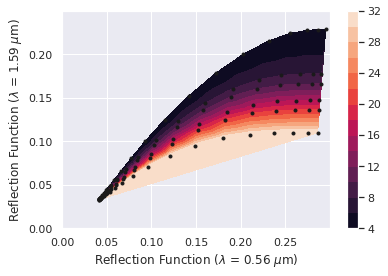

In [8]:
df2_numpy = df2_cloud_atm.to_numpy()

x_effr = df2_numpy[0]
for i in range(N_cloud_atm-1):
    x_effr = np.concatenate([x_effr, df2_numpy[i+1]])

y_effr = df2_numpy[N_cloud_atm]
for i in range(N_cloud_atm-1):
    y_effr = np.concatenate([y_effr, df2_numpy[i+1+N_cloud_atm]])

z_effr = np.concatenate([np.ones(N_dTau_cloud)*4, np.ones(N_dTau_cloud)*8, np.ones(N_dTau_cloud)*10, np.ones(N_dTau_cloud)*16, np.ones(N_dTau_cloud)*20, np.ones(N_dTau_cloud)*32])
z_effr = np.log(z_effr)

xi_effr = np.arange(0,0.3,0.0001)
yi_effr = np.arange(0,0.25,0.0001)
xi_effr,yi_effr = np.meshgrid(xi_effr,yi_effr)

zi_effr = griddata((x_effr,y_effr),z_effr,(xi_effr,yi_effr),method='linear')

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x_effr,y_effr,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
cntr1 = ax.contourf(xi_effr, yi_effr, np.exp(zi_effr), levels=14)

plt.colorbar(cntr1)
plt.show()

## Optical Depth Interpolation

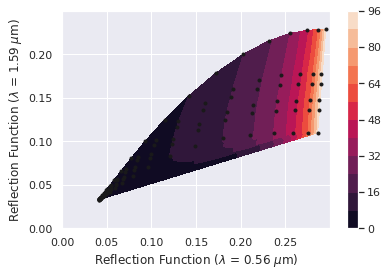

In [9]:
df_numpy = df_cloud_atm.to_numpy()

x_opd = df_numpy[0][0:N_cloud_atm]
for i in range(N_dTau_cloud-1):
    x_opd = np.concatenate([x_opd, df_numpy[i+1][0:N_cloud_atm]])

y_opd = df_numpy[0][N_cloud_atm:2*N_cloud_atm]
for i in range(N_dTau_cloud-1):
    y_opd = np.concatenate([y_opd, df_numpy[i+1][N_cloud_atm:2*N_cloud_atm]])

z_opd = np.ones(N_cloud_atm)*df_cloud_atm.index[0]
for i in range(N_dTau_cloud-1):
    z_opd = np.concatenate([z_opd, np.ones(N_cloud_atm)*df_cloud_atm.index[i+1]])

z_opd = np.log(z_opd)

xi_opd = np.arange(0,0.3,0.0001)
yi_opd = np.arange(0,0.25,0.0001)
xi_opd,yi_opd = np.meshgrid(xi_opd,yi_opd)

zi_opd = griddata((x_opd,y_opd),z_opd,(xi_opd,yi_opd),method='linear')

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.contourf(xi,yi,zi) # np.arange(0.18,0.2,0.001)
plt.plot(x_opd,y_opd,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
cntr1 = ax.contourf(xi_opd, yi_opd, np.exp(zi_opd), levels=14)

plt.colorbar(cntr1)
plt.show()

# Investigating Changing Height of the Cloud

In [139]:
df_cloud_0 = pd.read_csv("../create_atm/atmospheres/cloud_atm_2-3.csv", header = None, index_col = 0)

In [140]:
df2_cloud_0 = df_cloud_0.T

In [141]:
df2_numpy_0 = df2_cloud_0.to_numpy()

xi_effr_0 = df2_numpy_0[0]
for i in range(N_cloud_atm-1):
    xi_effr_0 = np.concatenate([xi_effr_0, df2_numpy_0[i+1]])

yi_effr_0 = df2_numpy_0[N_cloud_atm]
for i in range(N_cloud_atm-1):
    yi_effr_0 = np.concatenate([yi_effr_0, df2_numpy_0[i+1+N_cloud_atm]])



In [142]:
zi_effr_0 = griddata((x_effr,y_effr),z_effr,(xi_effr_0,yi_effr_0),method='linear')

In [143]:
np.exp(zi_effr_0)

array([ 4.34363016,  4.28704008,  4.24855796,  4.31466041,  4.27518504,
        4.28532336,  4.24600705,  4.20847095,  4.15569496,  4.1177028 ,
        4.0783655 ,  4.05333103,  4.03468486,  4.02356108,  4.01488554,
        4.00872218,  4.00430984,  4.00142804,  4.00010214,         nan,
        8.06089266,  8.15013345,  8.12578483,  8.24811041,  8.22472061,
        8.22661738,  8.22299711,  8.22801693,  8.22049558,  8.17188063,
        8.14102411,  8.10340614,  8.07167775,  8.04790173,  8.02550106,
        8.01234366,  8.00436769,  8.00074514,  7.99984225,  8.47094325,
       10.39834391, 10.41276585, 10.42337778, 10.49243473, 10.45398353,
       10.39975573, 10.37742534, 10.33340213, 10.30838293, 10.23756156,
       10.18349027, 10.1289747 , 10.08638879, 10.06100325, 10.0388376 ,
       10.01765952, 10.00598114, 10.00095304,  9.9997557 , 11.26645947,
       17.38024255, 16.91120439, 17.17367905, 17.41629492, 17.15510502,
       17.04501753, 16.86850346, 16.67156739, 16.54045746, 16.39

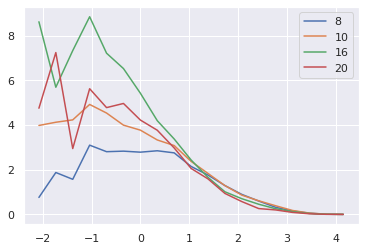

In [144]:
for i in range(1, N_cloud_atm-1):
    y = np.abs(np.exp(zi_effr_0[20*i:20*i+19])-effr_cloud[i])*100/effr_cloud[i]
    plt.plot(np.log(dTau_range_cloud[:len(dTau_range_cloud)-1]), y)
    plt.legend(effr_cloud[1:N_cloud_atm-1])

> error on the effective radius

In [145]:
effr_cloud

[4, 8, 10, 16, 20, 32]

In [146]:
#dTau_range_cloud

In [147]:
short_effr_cloud = effr_cloud[1:N_cloud_atm-1]
short_dTau_range = dTau_range_cloud[5:15]

In [148]:
x_error = [] # effective radius
for i in range(len(short_effr_cloud)):
    for j in range(len(short_dTau_range)):
        x_error.append(short_effr_cloud[i])

In [149]:
len(x_error)

40

In [150]:
y_error = [] # optical depth
for i in range(len(short_effr_cloud)):
    for j in range(len(short_dTau_range)):
        y_error.append(short_dTau_range[j])

In [151]:
len(y_error)

40

In [152]:
a = 10
z_error = abs((np.exp(zi_effr_0[25:35])-8)/8)
for i in range(2, N_cloud_atm-1):
    z_error = np.concatenate([z_error, abs((np.exp(zi_effr_0[5+i*N_dTau_cloud:15+i*N_dTau_cloud])-effr_cloud[i])/effr_cloud[i])])
    


In [153]:
z_error

array([0.02832717, 0.02787464, 0.02850212, 0.02756195, 0.02148508,
       0.01762801, 0.01292577, 0.00895972, 0.00598772, 0.00318763,
       0.03997557, 0.03774253, 0.03334021, 0.03083829, 0.02375616,
       0.01834903, 0.01289747, 0.00863888, 0.00610032, 0.00388376,
       0.0653136 , 0.05428147, 0.04197296, 0.03377859, 0.02437857,
       0.01657635, 0.01014155, 0.00703355, 0.00455954, 0.00254636,
       0.04968526, 0.04225938, 0.03769858, 0.02975598, 0.02059927,
       0.01590773, 0.00939559, 0.00574808, 0.00261662, 0.00200774])

In [154]:
xi_error = np.arange(0,20,0.01)
yi_error = np.arange(0,16,0.01)
xi_error,yi_error = np.meshgrid(xi_error,yi_error)

zi_error = griddata((x_error,y_error),z_error,(xi_error,yi_error),method='cubic')

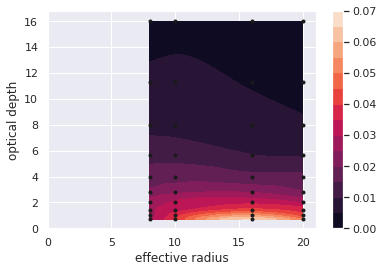

In [159]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.contourf(xi,yi,zi) # np.arange(0.18,0.2,0.001)
plt.plot(x_error,y_error,'k.')
plt.xlabel('effective radius')
plt.ylabel('optical depth')
cntr1 = ax.contourf(xi_error, yi_error, zi_error, levels=14)

plt.colorbar(cntr1)
plt.show()

In [156]:
z_error

array([0.02832717, 0.02787464, 0.02850212, 0.02756195, 0.02148508,
       0.01762801, 0.01292577, 0.00895972, 0.00598772, 0.00318763,
       0.03997557, 0.03774253, 0.03334021, 0.03083829, 0.02375616,
       0.01834903, 0.01289747, 0.00863888, 0.00610032, 0.00388376,
       0.0653136 , 0.05428147, 0.04197296, 0.03377859, 0.02437857,
       0.01657635, 0.01014155, 0.00703355, 0.00455954, 0.00254636,
       0.04968526, 0.04225938, 0.03769858, 0.02975598, 0.02059927,
       0.01590773, 0.00939559, 0.00574808, 0.00261662, 0.00200774])